<a href="https://colab.research.google.com/github/cmpm09/Aprendiendo-a-hacer-ETL/blob/Pandas/Pandas3_transformaci%C3%B3n_y_manipulaci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBLEMA DE NEGOCIO**


---



Se trata de una algoritmo capaz de analizar las características de una propiedad - como comodidades, tamaño, ocupación del espacio en un período determinado- y sugerir al amfitrión un precio a cobrar por tarifas diarias que garantice ganancias en momentos de alta demanda.


- Vamos a transformar los datos, no analizar.
- Algoritmo que analiza las características y que sugiere precios acorde: Pricing inteligente

#Aula 1 - Conociendo el problema

In [1]:
import pandas as pd

In [2]:
datos_originales = pd.read_json('/content/datos_hosting.json')
datos_originales.head()

,info_inmuebles
0,"{'evaluacion_general': '10.0', 'experiencia_lo..."
1,"{'evaluacion_general': '10.0', 'experiencia_lo..."
2,"{'evaluacion_general': '10.0', 'experiencia_lo..."
3,"{'evaluacion_general': '10.0', 'experiencia_lo..."
4,"{'evaluacion_general': '10.0', 'experiencia_lo..."


###Pricing inteligente

El pricing inteligente para alojamiento es una estrategia para estimar precios de forma automatizada y dinámica, que considera factores como oferta y demanda, estacionalidad, eventos locales, características de ubicación, entre otros. Con base en esta información, un algoritmo puede ajustar los precios para maximizar los ingresos y la rentabilidad del propietario.

Normalmente, esta estrategia se aplica a un modelo de inteligencia artificial que ajusta automáticamente los precios diarios. Por ejemplo, si aumenta la demanda de alojamiento en un destino en particular, los precios inteligentes ajustarán automáticamente las tarifas de las habitaciones hacia arriba para maximizar los ingresos de la propiedad. Del mismo modo, si la demanda disminuye, los precios inteligentes ajustarán los precios a la baja para mantener la ocupación de las propiedades y evitar pérdidas financieras.

Aunque el aprendizaje automático se utiliza a menudo en sistemas de precios inteligentes, existen otros enfoques que se pueden utilizar para implementar estos sistemas. Por ejemplo, puede utilizar un modelo de reglas basado en lógica y heurística para definir reglas y condiciones de precios.

Aun así, es importante destacar que el uso del **aprendizaje automático** puede ofrecer beneficios adicionales, como la capacidad de analizar grandes volúmenes de datos, identificar patrones de comportamiento del consumidor y ajustar los precios de forma más precisa y dinámica.

##Comprendiendo los datos

In [3]:
datos = pd.json_normalize(datos_originales['info_inmuebles'])
datos.head()

,evaluacion_general,experiencia_local,max_hospedes,descripcion_local,descripcion_vecindad,cantidad_baños,cantidad_cuartos,cantidad_camas,modelo_cama,comodidades,cuota_deposito,cuota_limpieza,precio
0,10.0,--,1,[This clean and comfortable one bedroom sits r...,[Lower Queen Anne is near the Seattle Center (...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Real Bed, Futon, Futon, Pull-out Sofa, Real B...","[{Internet,""Wireless Internet"",Kitchen,""Free P...","[$0, $0, $0, $0, $0, $350.00, $350.00, $350.00...","[$0, $0, $0, $20.00, $15.00, $28.00, $35.00, $...","[$110.00, $45.00, $55.00, $52.00, $85.00, $50...."
1,10.0,--,10,[Welcome to the heart of the 'Ballard Brewery ...,"[--, Capital Hill is the heart of Seattle, bor...","[2, 3, 2, 3, 3, 3, 2, 1, 2, 2, 2]","[3, 4, 2, 3, 3, 3, 3, 3, 3, 4, 3]","[5, 6, 8, 3, 3, 5, 4, 5, 6, 7, 4]","[Real Bed, Real Bed, Real Bed, Real Bed, Real ...","[{TV,Internet,""Wireless Internet"",Kitchen,""Fre...","[$500.00, $300.00, $0, $300.00, $300.00, $360....","[$125.00, $100.00, $85.00, $110.00, $110.00, $...","[$350.00, $300.00, $425.00, $300.00, $285.00, ..."
2,10.0,--,11,[New modern house built in 2013. Spectacular ...,[Upper Queen Anne is a charming neighborhood f...,[4],[5],[7],[Real Bed],"[{TV,""Cable TV"",Internet,""Wireless Internet"",""...","[$1,000.00]",[$300.00],[$975.00]
3,10.0,--,12,[Our NW style home is 3200+ sq ft with 3 level...,[The Views from our top floor! Wallingford ha...,"[3, 3, 3, 3, 3, 3, 3, 3]","[6, 6, 5, 5, 5, 5, 4, 4]","[6, 6, 7, 8, 7, 7, 6, 6]","[Real Bed, Real Bed, Real Bed, Real Bed, Real ...","[{Internet,""Wireless Internet"",Kitchen,""Free P...","[$500.00, $500.00, $500.00, $500.00, $500.00, ...","[$225.00, $300.00, $250.00, $250.00, $250.00, ...","[$490.00, $550.00, $350.00, $350.00, $350.00, ..."
4,10.0,--,14,"[Perfect for groups. 2 bedrooms, full bathroom...",[Safeway grocery store within walking distance...,"[2, 3]","[2, 6]","[3, 9]","[Real Bed, Real Bed]","[{TV,Internet,""Wireless Internet"",Kitchen,""Fre...","[$300.00, $2,000.00]","[$40.00, $150.00]","[$200.00, $545.00]"


In [4]:
datos.info

<bound method DataFrame.info of    evaluacion_general experiencia_local max_hospedes  \
0                10.0                --            1   
1                10.0                --           10   
2                10.0                --           11   
3                10.0                --           12   
4                10.0                --           14   
..                ...               ...          ...   
65                nan                --            5   
66                nan                --            6   
67                nan                --            7   
68                nan                --            8   
69                nan                --            9   

                                    descripcion_local  \
0   [This clean and comfortable one bedroom sits r...   
1   [Welcome to the heart of the 'Ballard Brewery ...   
2   [New modern house built in 2013.  Spectacular ...   
3   [Our NW style home is 3200+ sq ft with 3 level...   
4   [Perfect for groups. 2 bedrooms, full bathroom...   
..                                                ...   
65  [Our cozy little bungalow is the perfect place...   
66  [Bright clean 2 bedroom 1 bath appartment in t...   
67  [Beautiful end-unit townhome with lots of dayl...   
68  [Heart of Ballard new townhome with 4 BRs + ba...   
69  [This business-themed modern home features:  *...   

                                 descripcion_vecindad  \
0   [Lower Queen Anne is near the Seattle Center (...   
1   [--, Capital Hill is the heart of Seattle, bor...   
2   [Upper Queen Anne is a charming neighborhood f...   
3   [The Views from our top floor!  Wallingford ha...   
4   [Safeway grocery store within walking distance...   
..                                                ...   
65  [The Queen Anne neighborhood is one of the mos...   
66  [Ballard is the most interesting and ecclectic...   
67  [Cherry blossoms (Sakura) in the spring, every...   
68  [--, --, The suite is conveniently located off...   
69  [Your hosts made Madison Valley their home whe...   

                                       cantidad_baños  \
0   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1                   [2, 3, 2, 3, 3, 3, 2, 1, 2, 2, 2]   
2                                                 [4]   
3                            [3, 3, 3, 3, 3, 3, 3, 3]   
4                                              [2, 3]   
..                                                ...   
65  [1, 3, 2, 2, 2, 1, 2, 1, 1, 1, 2, 3, 2, 2, 2, ...   
66  [1, 1, 3, 2, 1, 3, 2, 2, 1, 2, 2, 2, 1, 2, 1, ...   
67                     [4, 3, 1, 2, 2, 1, 2, 1, 2, 2]   
68  [2, 2, 3, 1, 1, 2, 1, 3, 2, 1, 2, 1, 2, 2, 2, ...   
69                                             [2, 1]   

                                     cantidad_cuartos  \
0   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1                   [3, 4, 2, 3, 3, 3, 3, 3, 3, 4, 3]   
2                                                 [5]   
3                            [6, 6, 5, 5, 5, 5, 4, 4]   
4                                              [2, 6]   
..                                                ...   
65  [2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, ...   
66  [2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 4, 3, 3, ...   
67                     [3, 4, 3, 3, 3, 3, 3, 3, 3, 4]   
68  [4, 2, 3, 4, 3, 3, 4, 4, 3, 5, 2, 3, 3, 4, 5, ...   
69                                             [3, 4]   

                                       cantidad_camas  \
0   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1                   [5, 6, 8, 3, 3, 5, 4, 5, 6, 7, 4]   
2                                                 [7]   
3                            [6, 6, 7, 8, 7, 7, 6, 6]   
4                                              [3, 9]   
..                                                ...   
65  [3, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, ...   
66  [3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 2, 4, 4, 3, ...   
67                     [3, 5, 1, 5, 3, 2, 

# Aula 2 - Datos numéricos

### Descripción de los datos

Cuando trabajamos con cualquier conjunto de datos, necesitamos saber qué información nos aportan esos datos, porque solo así podremos estudiarlos y analizarlos para desarrollar una solución de análisis y procesamiento de datos.

En este curso trabajaremos con el conjunto de datos presentes en el archivo datos_hosting.json y, para avanzar en nuestros estudios sobre los datos que proporciona este archivo, entenderemos qué información trae cada columna.

- evaluacion_general: se refiere a la puntuación media otorgada para evaluar el alojamiento en la propiedad.
- experiencia_local: describe las experiencias ofrecidas durante su estancia en la propiedad.
- max_hospedes: informa el número máximo de invitados que permite la ubicación.
- descripcion_local: describe la propiedad.
- descripcion_vecindad: describe el vecindario alrededor de la propiedad.
- cantidad_baños: informa el número de baños disponibles.
- cantidad_cuartos: informa el número de habitaciones disponibles.
- cantidad_camas: informa el número de camas disponibles.
- modelo_cama: informa el modelo de cama ofrecido.
- comodidades: informa las comodidades que ofrece la propiedad.
- cuota_deposito: informa la tarifa mínima de depósito para la seguridad del hosting.
- cuota_limpieza: informa el cargo cobrado por el servicio de limpieza.
- precio: se refiere al precio base a cobrar por la estancia diaria en la propiedad.

##Retirando listas

In [5]:
columnas = list(datos.columns)
columnas

['evaluacion_general',
 'experiencia_local',
 'max_hospedes',
 'descripcion_local',
 'descripcion_vecindad',
 'cantidad_baños',
 'cantidad_cuartos',
 'cantidad_camas',
 'modelo_cama',
 'comodidades',
 'cuota_deposito',
 'cuota_limpieza',
 'precio']

In [6]:
datos2 = datos.explode(columnas[3:])
datos2.head()

,evaluacion_general,experiencia_local,max_hospedes,descripcion_local,descripcion_vecindad,cantidad_baños,cantidad_cuartos,cantidad_camas,modelo_cama,comodidades,cuota_deposito,cuota_limpieza,precio
0,10.0,--,1,This clean and comfortable one bedroom sits ri...,Lower Queen Anne is near the Seattle Center (s...,1,1,1,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",$0,$0,$110.00
0,10.0,--,1,Our century old Upper Queen Anne house is loca...,"Upper Queen Anne is a really pleasant, unique ...",1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$0,$0,$45.00
0,10.0,--,1,Cozy room in two-bedroom apartment along the l...,The convenience of being in Seattle but on the...,1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$0,$0,$55.00
0,10.0,--,1,Very lovely and cozy room for one. Convenientl...,"Ballard is lovely, vibrant and one of the most...",1,1,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",$0,$20.00,$52.00
0,10.0,--,1,The “Studio at Mibbett Hollow' is in a Beautif...,--,1,1,1,Real Bed,"{""Wireless Internet"",Kitchen,""Free Parking on ...",$0,$15.00,$85.00


In [7]:
datos2.reset_index(inplace=True, drop=True)
datos2.head()

,evaluacion_general,experiencia_local,max_hospedes,descripcion_local,descripcion_vecindad,cantidad_baños,cantidad_cuartos,cantidad_camas,modelo_cama,comodidades,cuota_deposito,cuota_limpieza,precio
0,10.0,--,1,This clean and comfortable one bedroom sits ri...,Lower Queen Anne is near the Seattle Center (s...,1,1,1,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",$0,$0,$110.00
1,10.0,--,1,Our century old Upper Queen Anne house is loca...,"Upper Queen Anne is a really pleasant, unique ...",1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$0,$0,$45.00
2,10.0,--,1,Cozy room in two-bedroom apartment along the l...,The convenience of being in Seattle but on the...,1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$0,$0,$55.00
3,10.0,--,1,Very lovely and cozy room for one. Convenientl...,"Ballard is lovely, vibrant and one of the most...",1,1,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",$0,$20.00,$52.00
4,10.0,--,1,The “Studio at Mibbett Hollow' is in a Beautif...,--,1,1,1,Real Bed,"{""Wireless Internet"",Kitchen,""Free Parking on ...",$0,$15.00,$85.00


In [8]:
datos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   evaluacion_general    3818 non-null   object
 1   experiencia_local     3818 non-null   object
 2   max_hospedes          3818 non-null   object
 3   descripcion_local     3818 non-null   object
 4   descripcion_vecindad  3818 non-null   object
 5   cantidad_baños        3818 non-null   object
 6   cantidad_cuartos      3818 non-null   object
 7   cantidad_camas        3818 non-null   object
 8   modelo_cama           3818 non-null   object
 9   comodidades           3818 non-null   object
 10  cuota_deposito        3818 non-null   object
 11  cuota_limpieza        3818 non-null   object
 12  precio                3818 non-null   object
dtypes: object(13)
memory usage: 387.9+ KB


##Convirtiendo datos numericos

In [9]:
import numpy as np

In [10]:
datos2['max_hospedes'] = datos2['max_hospedes'].astype(np.int64)
#Solo funciona cuando si son números enteros, si solo hay uno que no sea, no lo hará

In [11]:
datos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   evaluacion_general    3818 non-null   object
 1   experiencia_local     3818 non-null   object
 2   max_hospedes          3818 non-null   int64 
 3   descripcion_local     3818 non-null   object
 4   descripcion_vecindad  3818 non-null   object
 5   cantidad_baños        3818 non-null   object
 6   cantidad_cuartos      3818 non-null   object
 7   cantidad_camas        3818 non-null   object
 8   modelo_cama           3818 non-null   object
 9   comodidades           3818 non-null   object
 10  cuota_deposito        3818 non-null   object
 11  cuota_limpieza        3818 non-null   object
 12  precio                3818 non-null   object
dtypes: int64(1), object(12)
memory usage: 387.9+ KB


In [12]:
col_numericas = ['cantidad_baños', 'cantidad_cuartos', 'cantidad_camas']

In [13]:
datos2[col_numericas] = datos2[col_numericas].astype(np.int64)

In [14]:
datos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   evaluacion_general    3818 non-null   object
 1   experiencia_local     3818 non-null   object
 2   max_hospedes          3818 non-null   int64 
 3   descripcion_local     3818 non-null   object
 4   descripcion_vecindad  3818 non-null   object
 5   cantidad_baños        3818 non-null   int64 
 6   cantidad_cuartos      3818 non-null   int64 
 7   cantidad_camas        3818 non-null   int64 
 8   modelo_cama           3818 non-null   object
 9   comodidades           3818 non-null   object
 10  cuota_deposito        3818 non-null   object
 11  cuota_limpieza        3818 non-null   object
 12  precio                3818 non-null   object
dtypes: int64(4), object(9)
memory usage: 387.9+ KB


In [15]:
#datos2['precio '] = datos2['precio'].astype(np.float64)
#No sirve porque tiene caracteres de dinero ($)

In [16]:
datos2['evaluacion_general'] = datos2['evaluacion_general'].astype(np.float64)
datos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   evaluacion_general    3162 non-null   float64
 1   experiencia_local     3818 non-null   object 
 2   max_hospedes          3818 non-null   int64  
 3   descripcion_local     3818 non-null   object 
 4   descripcion_vecindad  3818 non-null   object 
 5   cantidad_baños        3818 non-null   int64  
 6   cantidad_cuartos      3818 non-null   int64  
 7   cantidad_camas        3818 non-null   int64  
 8   modelo_cama           3818 non-null   object 
 9   comodidades           3818 non-null   object 
 10  cuota_deposito        3818 non-null   object 
 11  cuota_limpieza        3818 non-null   object 
 12  precio                3818 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 387.9+ KB


### Precisión de valores numéricos

Por lo general, cuando los datos son muy grandes y tenemos poca memoria disponible, es habitual utilizar tipos de datos más compactos para reducir el consumo de memoria. Sin embargo, siempre es importante asegurarse de que **la elección del tipo de datos no perjudique la precisión o exactitud de los resultados.**

Cuando trabajamos con números enteros con Python, podemos tener diferentes tipos de datos, cada uno con sus limitaciones y características. Durante las clases trabajamos con `int64` , un número entero con precisión de 64 bits. Para entender el significado de esta precisión, es importante conocer algunos términos técnicos, como byte y bit:

- **Byte:** es una unidad de medida de información, que representa un conjunto de 8 bits.
- **Bit:** es la unidad de información más pequeña utilizada en los sistemas digitales, y puede tomar los valores de 0 o 1.

**Tipo entero**
Con los conceptos de bit y byte claros, podemos comprender mejor el significado de `int64`, que es el tipo de entero que utiliza 8 bytes de almacenamiento: 8 bits en cada byte, lo que da como resultado 64 bits en total. Este tipo de entero es capaz de representar números muy grandes, que pueden oscilar entre `-9.223.372.036.854.775.808` y `9.223.372.036.854.775.807`.

Además, tenemos otros números enteros cuya precisión se puede definir, como `int32`, un tipo de datos entero que utiliza 4 bytes - 8 bits en cada byte, lo que da como resultado 32 bits en total. Es capaz de representar números enteros menores que los representados por `int64`, con un máximo de `-2.147.483.648` a `2.147.483.647`.

Puede ser más común encontrar los tipos `int64` y `int32`, pero puede ser necesario, en algunas situaciones, utilizar otros tipos de datos enteros, como `int8` o `int16`. Tipos de datos como estos son útiles cuando necesita ahorrar más memoria y no trabaja con valores grandes. Puede consultar los tipos de números enteros en la siguiente tabla:

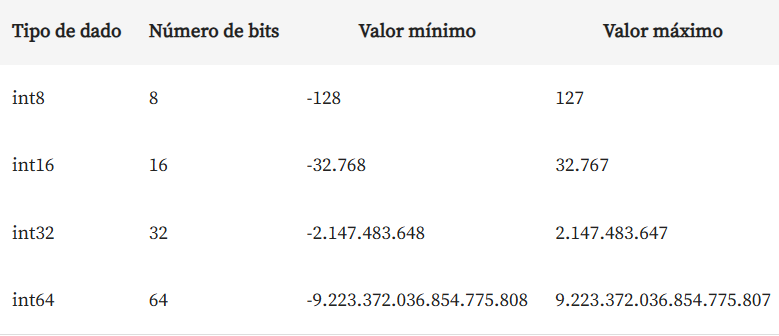

La elección de qué valor de precisión dependerá de la situación y la naturaleza de los datos que se manipulan. Si los valores que se analizan son relativamente pequeños, el uso de `int32`, por ejemplo, **puede ser suficiente y puede ahorrar espacio en la memoria**. Sin embargo, si estuviéramos trabajando con datos científicos, por ejemplo, que requieren valores muy grandes, es posible que necesitemos usar `int64`.

**Tipo float**

Además de los números enteros, otros tipos de datos, como `float`, también utilizan esta opción de precisión como opción para controlar el espacio de memoria. Al igual que los números enteros, el tipo float también tiene opciones de precisión: entre los tipos más comunes se encuentran `float32` y `float64`.

El tipo `float64` es un número de punto flotante con 64 bits de precisión, que representa un número decimal de hasta 15 dígitos. Por otro lado, `float32` es más pequeño tanto en su capacidad de bits, con 32 en total, como en su capacidad de precisión decimal, con capacidad de precisión de hasta 7 dígitos.

## Números en strings

In [17]:
datos2['precio'].head(2)

,precio
0,$110.00
1,$45.00


In [18]:
datos2['precio'] = datos2['precio'].apply(lambda x: str(x).replace('$', '').replace(',', '').strip())

In [19]:
datos2['precio'] = datos2['precio'].astype(np.float64)

In [20]:
datos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   evaluacion_general    3162 non-null   float64
 1   experiencia_local     3818 non-null   object 
 2   max_hospedes          3818 non-null   int64  
 3   descripcion_local     3818 non-null   object 
 4   descripcion_vecindad  3818 non-null   object 
 5   cantidad_baños        3818 non-null   int64  
 6   cantidad_cuartos      3818 non-null   int64  
 7   cantidad_camas        3818 non-null   int64  
 8   modelo_cama           3818 non-null   object 
 9   comodidades           3818 non-null   object 
 10  cuota_deposito        3818 non-null   object 
 11  cuota_limpieza        3818 non-null   object 
 12  precio                3818 non-null   float64
dtypes: float64(2), int64(4), object(7)
memory usage: 387.9+ KB


##Transformando múltiples columnas

In [21]:
datos2[['cuota_deposito', 'cuota_limpieza']] = datos2[['cuota_deposito', 'cuota_limpieza']].applymap(lambda x: str(x).replace('$', '').replace(',', '').strip())
#Para examinar más de una columna se ponen dos corchetes
#Cuando tratamos con una columna es Dataframe, más de una es Series, por esto se usa applymap



<ipython-input-21-2a6b02b3ede8>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  datos2[['cuota_deposito', 'cuota_limpieza']] = datos2[['cuota_deposito', 'cuota_limpieza']].applymap(lambda x: str(x).replace('$', '').replace(',', '').strip())


In [22]:
datos2[['cuota_deposito', 'cuota_limpieza']] = datos2[['cuota_deposito', 'cuota_limpieza']].astype(np.float64)

In [23]:
datos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   evaluacion_general    3162 non-null   float64
 1   experiencia_local     3818 non-null   object 
 2   max_hospedes          3818 non-null   int64  
 3   descripcion_local     3818 non-null   object 
 4   descripcion_vecindad  3818 non-null   object 
 5   cantidad_baños        3818 non-null   int64  
 6   cantidad_cuartos      3818 non-null   int64  
 7   cantidad_camas        3818 non-null   int64  
 8   modelo_cama           3818 non-null   object 
 9   comodidades           3818 non-null   object 
 10  cuota_deposito        3818 non-null   float64
 11  cuota_limpieza        3818 non-null   float64
 12  precio                3818 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 387.9+ KB


# Aula 3 - Datos de texto

##El problema del texto

In [24]:
datos2.head()

,evaluacion_general,experiencia_local,max_hospedes,descripcion_local,descripcion_vecindad,cantidad_baños,cantidad_cuartos,cantidad_camas,modelo_cama,comodidades,cuota_deposito,cuota_limpieza,precio
0,10.0,--,1,This clean and comfortable one bedroom sits ri...,Lower Queen Anne is near the Seattle Center (s...,1,1,1,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",0.0,0.0,110.0
1,10.0,--,1,Our century old Upper Queen Anne house is loca...,"Upper Queen Anne is a really pleasant, unique ...",1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",0.0,0.0,45.0
2,10.0,--,1,Cozy room in two-bedroom apartment along the l...,The convenience of being in Seattle but on the...,1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",0.0,0.0,55.0
3,10.0,--,1,Very lovely and cozy room for one. Convenientl...,"Ballard is lovely, vibrant and one of the most...",1,1,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",0.0,20.0,52.0
4,10.0,--,1,The “Studio at Mibbett Hollow' is in a Beautif...,--,1,1,1,Real Bed,"{""Wireless Internet"",Kitchen,""Free Parking on ...",0.0,15.0,85.0


In [25]:
datos2['descripcion_local'].head(2)

,descripcion_local
0,This clean and comfortable one bedroom sits ri...
1,Our century old Upper Queen Anne house is loca...


In [26]:
# Llevarlo a minúscula
datos2['descripcion_local'] = datos2['descripcion_local'].str.lower()
datos2['descripcion_local'].head(2)

,descripcion_local
0,this clean and comfortable one bedroom sits ri...
1,our century old upper queen anne house is loca...


In [27]:
#Examinar una sola variable
datos2['descripcion_local'][3169]

"built, run and supported by seattle tech and start up veterans, grokhome's focus is to create a supportive environment for smart people working on interesting projects, start ups and more. this listing is an upper bunk, in a 2-person shared room. *note: this fall, there will be major renovations happening on one kitchen and bathroom at a time. there will always be two other working kitchens and two working bathrooms in the house. we'll work to minimize the impact these renovations have on your stay. **this listing is only available to those working in the tech/science space. live in a hacker house, and immerse yourself in the seattle tech scene. you can expect to be surrounded by smart people solving big problems or working on something fun. we have frequent demo nights, and love when our guests share something they are passionate about. if you're new to the city, our deep ties to the seattle tech scene can help you get involved. expand your network, develop your ideas, and learn some

In [28]:
# Remplazo complejo, en el primero pone lo que no replazara
datos2['descripcion_local'] = datos2['descripcion_local'].str.replace('[^a-zA-Z0-9\-\']', ' ', regex=True)
datos2['descripcion_local'][3169]

"built  run and supported by seattle tech and start up veterans  grokhome's focus is to create a supportive environment for smart people working on interesting projects  start ups and more  this listing is an upper bunk  in a 2-person shared room   note  this fall  there will be major renovations happening on one kitchen and bathroom at a time  there will always be two other working kitchens and two working bathrooms in the house  we'll work to minimize the impact these renovations have on your stay    this listing is only available to those working in the tech science space  live in a hacker house  and immerse yourself in the seattle tech scene  you can expect to be surrounded by smart people solving big problems or working on something fun  we have frequent demo nights  and love when our guests share something they are passionate about  if you're new to the city  our deep ties to the seattle tech scene can help you get involved  expand your network  develop your ideas  and learn some

In [29]:
datos2['descripcion_local'] = datos2['descripcion_local'].str.replace('(?<!\\b)-(?!\\w)', ' ', regex=True)
datos2['descripcion_local'][3169]

"built  run and supported by seattle tech and start up veterans  grokhome's focus is to create a supportive environment for smart people working on interesting projects  start ups and more  this listing is an upper bunk  in a 2-person shared room   note  this fall  there will be major renovations happening on one kitchen and bathroom at a time  there will always be two other working kitchens and two working bathrooms in the house  we'll work to minimize the impact these renovations have on your stay    this listing is only available to those working in the tech science space  live in a hacker house  and immerse yourself in the seattle tech scene  you can expect to be surrounded by smart people solving big problems or working on something fun  we have frequent demo nights  and love when our guests share something they are passionate about  if you're new to the city  our deep ties to the seattle tech scene can help you get involved  expand your network  develop your ideas  and learn some

### Profundizando en Regex

Regex (o expresión regular) es una secuencia de caracteres que define un patrón de búsqueda en un texto. Es una herramienta poderosa y versátil que le permite buscar, reemplazar y manipular patrones de texto de manera eficiente. Regex se usa ampliamente en diferentes áreas, incluida la programación, la ciencia de datos y el procesamiento de textos.

En la ciencia de datos, las expresiones regulares se utilizan a menudo para procesar datos de texto sin formato. Algunas de estas aplicaciones incluyen limpieza de datos, donde se pueden usar expresiones regulares para buscar y reemplazar ciertos caracteres. También se puede utilizar en proyectos de clasificación; un ejemplo es el uso de expresiones regulares para ayudar a encontrar patrones en el texto de los correos electrónicos, lo que ayuda a clasificar si son spam o no.

En general, las expresiones regulares permiten a los científicos de datos procesar, analizar y clasificar grandes volúmenes de datos de texto de forma eficiente y automatizada. El uso adecuado de expresiones regulares puede ayudar a extraer información valiosa de los datos de texto, además de facilitar la limpieza y organización de esos datos.

Puedes crear una expresión regular con la ayuda del sitio web regex101.com. Si quieres saber más sobre regex y su aplicación en bases de datos, vale la pena leer el artículo Principales casos de uso de Regex para procesamiento de datos, que muestra una aplicación regex en banco de datos.

Puede estudiar expresiones regulares y aprender algunas de sus reglas básicas, como las presentadas en el curso, y a medida que se familiarice con el uso de expresiones regulares, podrá comenzar a explorar otras funciones y características más avanzadas para crear patrones más complejos en sus códigos.

## Tokenización de strings

In [30]:
datos2['descripcion_local'] = datos2['descripcion_local'].str.split()
datos2.head(2)


,evaluacion_general,experiencia_local,max_hospedes,descripcion_local,descripcion_vecindad,cantidad_baños,cantidad_cuartos,cantidad_camas,modelo_cama,comodidades,cuota_deposito,cuota_limpieza,precio
0,10.0,--,1,"[this, clean, and, comfortable, one, bedroom, ...",Lower Queen Anne is near the Seattle Center (s...,1,1,1,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",0.0,0.0,110.0
1,10.0,--,1,"[our, century, old, upper, queen, anne, house,...","Upper Queen Anne is a really pleasant, unique ...",1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",0.0,0.0,45.0


In [31]:
datos2['comodidades'] = datos2['comodidades'].str.replace('\{|}|\"','', regex=True)
datos2['comodidades'].head(2)

,comodidades
0,"Internet,Wireless Internet,Kitchen,Free Parkin..."
1,"TV,Internet,Wireless Internet,Kitchen,Free Par..."


In [32]:
datos2['comodidades'] = datos2['comodidades'].str.split(',')
datos2['comodidades'].head(2)

,comodidades
0,"[Internet, Wireless Internet, Kitchen, Free Pa..."
1,"[TV, Internet, Wireless Internet, Kitchen, Fre..."


###Desafío: columnas "descripción_vecindad"

In [33]:
datos2.head(2)

,evaluacion_general,experiencia_local,max_hospedes,descripcion_local,descripcion_vecindad,cantidad_baños,cantidad_cuartos,cantidad_camas,modelo_cama,comodidades,cuota_deposito,cuota_limpieza,precio
0,10.0,--,1,"[this, clean, and, comfortable, one, bedroom, ...",Lower Queen Anne is near the Seattle Center (s...,1,1,1,Real Bed,"[Internet, Wireless Internet, Kitchen, Free Pa...",0.0,0.0,110.0
1,10.0,--,1,"[our, century, old, upper, queen, anne, house,...","Upper Queen Anne is a really pleasant, unique ...",1,1,1,Futon,"[TV, Internet, Wireless Internet, Kitchen, Fre...",0.0,0.0,45.0


In [34]:
datos2['descripcion_vecindad'][0]

"Lower Queen Anne is near the Seattle Center (space needle, EMP museum, Glass museum, Science Center and Children's museum). It's also near SAM sculpture park, stores, restaurants, SIFF theater and more."

In [35]:
datos2['descripcion_vecindad'] = datos2['descripcion_vecindad'].astype(str)
datos2['descripcion_vecindad'] = datos2['descripcion_vecindad'].str.lower()
datos2['descripcion_vecindad'].head(2)

,descripcion_vecindad
0,lower queen anne is near the seattle center (s...
1,"upper queen anne is a really pleasant, unique ..."


In [36]:
datos2['descripcion_vecindad'] = datos2['descripcion_vecindad'].str.replace('[^a-zA-Z0-9\-\']', ' ', regex=True)
datos2['descripcion_vecindad'][0]

"lower queen anne is near the seattle center  space needle  emp museum  glass museum  science center and children's museum   it's also near sam sculpture park  stores  restaurants  siff theater and more "

In [37]:
datos2['descripcion_vecindad'] = datos2['descripcion_vecindad'].str.replace('(?<!\\b)-(?!\\w)', ' ', regex=True)
datos2['descripcion_vecindad'][0]

"lower queen anne is near the seattle center  space needle  emp museum  glass museum  science center and children's museum   it's also near sam sculpture park  stores  restaurants  siff theater and more "

In [38]:
datos2['descripcion_vecindad'] = datos2['descripcion_vecindad'].str.split()
datos2['descripcion_vecindad'].head(1)


,descripcion_vecindad
0,"[lower, queen, anne, is, near, the, seattle, c..."


In [39]:
datos2.head(2)

,evaluacion_general,experiencia_local,max_hospedes,descripcion_local,descripcion_vecindad,cantidad_baños,cantidad_cuartos,cantidad_camas,modelo_cama,comodidades,cuota_deposito,cuota_limpieza,precio
0,10.0,--,1,"[this, clean, and, comfortable, one, bedroom, ...","[lower, queen, anne, is, near, the, seattle, c...",1,1,1,Real Bed,"[Internet, Wireless Internet, Kitchen, Free Pa...",0.0,0.0,110.0
1,10.0,--,1,"[our, century, old, upper, queen, anne, house,...","[upper, queen, anne, is, a, really, pleasant, ...",1,1,1,Futon,"[TV, Internet, Wireless Internet, Kitchen, Fre...",0.0,0.0,45.0


# **Aula 4 - Datos de tiempo**

##El tipo datetime

La clase `datetime` es un tipo de datos que representa una fecha y hora específicas en Python. Permite trabajar y manipular datos de año, mes, día, hora, minuto, segundo y microsegundo, así como días de la semana, como lunes, martes, miércoles, etc. Esta clase está definida en el módulo `datetime` y es fundamental para manipular fechas y horas en Python. Con él es posible realizar operaciones de cálculo de diferencias entre fechas, formatear fechas y horas en diferentes formatos, además de ser muy útil para analizar datos que involucran series temporales.

Con la biblioteca Pandas es posible realizar diversas operaciones con fechas y horas, como convertir datos de cadena a datetime, filtrar datos en función de intervalos de tiempo específicos, agregar datos por hora, día, mes o año, entre otras funcionalidades. Por tanto, con esta biblioteca es posible realizar diversas operaciones con fechas de forma sencilla y eficiente dentro de un conjunto de datos.

### **Biblioteca datetime**

Podemos trabajar directamente con `datetime` a través de la biblioteca `datetime`, una biblioteca estándar de Python que proporciona clases para trabajar con fechas y horas. Con esta biblioteca, puede crear objetos de fecha y hora, realizar cálculos de tiempo, formatear fechas y horas en diferentes formatos y mucho más.

Dentro de la biblioteca `datetime`, existe la clase de fecha y hora, que representa una fecha y hora específicas. Vea un ejemplo:

In [40]:
import datetime

# creando un objeto datetime con la fecha y hora actual
ahora = datetime.datetime.now()

print("Fecha y hora actual:", ahora)

Fecha y hora actual: 2025-05-15 05:57:52.157237


En este ejemplo, el método `now()` de la clase datetime se utiliza para crear un objeto que representa la fecha y hora actuales. El objeto resultante se almacena en la variable ahora y luego se imprime en la pantalla usando la función `print()`.

Otra clase importante en la biblioteca `datetime` es la clase `date`, que representa solo una fecha. Vea un ejemplo:

In [41]:
import datetime
# creando un objeto date con la fecha de hoy
hoy = datetime.date.today()

print("Fecha de hoy:", hoy)

Fecha de hoy: 2025-05-15


En este ejemplo, el método `today()` de la clase `date` se utiliza para crear un objeto que representa la fecha de hoy. El objeto resultante se almacena en la variable `hoy` y luego se imprime en la pantalla usando la función `print()`.

La biblioteca `datetime` también le permite realizar operaciones matemáticas con fechas y horas. Vea un ejemplo de cómo calcular la diferencia entre dos fechas:

In [42]:
import datetime

# creando dos objetos date con fechas diferentes
data_1 = datetime.date(2022, 1, 1)
data_2 = datetime.date(2023, 1, 1)

# calculando la diferencia entre las dos fechas
diferencia = data_2 - data_1

print("Diferencia entre las dos fechas:", diferencia)

Diferencia entre las dos fechas: 365 days, 0:00:00


En este ejemplo, se crean dos objetos `date` con fechas diferentes. Luego se utiliza el operador de resta para calcular la diferencia entre las dos fechas. El resultado se almacena en la variable `diferencia` y luego se imprime en la pantalla usando la función `print()`.

## Transformando datos de tiempo

In [44]:
dt_data = pd.read_json('/content/inmuebles_disponibles.json')
dt_data.head(2)

,id,fecha,lugar_disponible,precio
0,857,2016-01-04,False,None
1,857,2016-01-05,False,None


In [45]:
dt_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365000 entries, 0 to 364999
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                365000 non-null  int64 
 1   fecha             365000 non-null  object
 2   lugar_disponible  365000 non-null  bool  
 3   precio            270547 non-null  object
dtypes: bool(1), int64(1), object(2)
memory usage: 11.5+ MB


In [48]:
dt_data['fecha'] = pd.to_datetime(dt_data['fecha'])

In [49]:
dt_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365000 entries, 0 to 364999
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                365000 non-null  int64         
 1   fecha             365000 non-null  datetime64[ns]
 2   lugar_disponible  365000 non-null  bool          
 3   precio            270547 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(1)
memory usage: 11.5+ MB


In [50]:
dt_data.head(2)

,id,fecha,lugar_disponible,precio
0,857,2016-01-04,False,None
1,857,2016-01-05,False,None


##Personalización de agrupación por fecha

In [51]:

dt_data['fecha'].dt.strftime('%Y-%m')

,fecha
0,2016-01
1,2016-01
2,2016-01
3,2016-01
4,2016-01
...,...
364995,2016-12
364996,2016-12
364997,2016-12
364998,2017-01


In [53]:
subset = dt_data.groupby(dt_data['fecha'].dt.strftime('%Y-%m'))['lugar_disponible'].sum()
subset
#groupby = agrupar
#Como 'lugar_disponible'	es booleano, contará de manera directa los true

,lugar_disponible
fecha,
2016-01,16543
2016-02,20128
2016-03,23357
2016-04,22597
2016-05,23842
2016-06,23651
2016-07,22329
2016-08,22529
2016-09,22471


In [54]:
# importamos la biblioteca numpy
import numpy as np

# utilizamos el método fillna para llenar los elementos vacíos por '0.0'
# definimos el parámetro de inplace para True para substituir en el DataFrame
dt_data['precio'].fillna('0.0', inplace = True)

# borramos el $ y las comas con apply lambda
dt_data['precio'] = dt_data['precio'].apply(lambda x: x.replace('$', '').replace(',',''))

# transformamos los tipos de datos para float64
dt_data['precio'] = dt_data['precio'].astype(np.float64)

# observamos el resultado final
dt_data

<ipython-input-54-50192986dc7d>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt_data['precio'].fillna('0.0', inplace = True)


,id,fecha,lugar_disponible,precio
0,857,2016-01-04,False,0.0
1,857,2016-01-05,False,0.0
2,857,2016-01-06,False,0.0
3,857,2016-01-07,False,0.0
4,857,2016-01-08,False,0.0
...,...,...,...,...
364995,3279,2016-12-29,True,140.0
364996,3279,2016-12-30,True,140.0
364997,3279,2016-12-31,True,140.0
364998,3279,2017-01-01,True,140.0
